import libraries


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

%matplotlib inline

loading datasets

In [3]:
# Load the dataset with the appropriate encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4334,ham,"Now u sound like manky scouse boy steve,like! ...",NaN,NaN,NaN
5230,ham,"Nope, I'm still in the market",NaN,NaN,NaN
1763,ham,Joy's father is John. Then John is the NAME of...,NaN,NaN,NaN
4319,ham,Hey mr and I are going to the sea view and ha...,NaN,NaN,NaN
4823,ham,Not thought bout it... || Drink in tap & spile...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Keep only the first two columns
df = df.iloc[:, :2] 

In [9]:
df.sample(5)

,v1,v2
3352,ham,I emailed yifeng my part oredi.. Can Ì_ get it...
2839,ham,BABE !!! I miiiiiiissssssssss you ! I need you...
5105,ham,I wnt to buy a BMW car urgently..its vry urgen...
1613,ham,Thnx dude. u guys out 2nite?
3586,ham,Our ride equally uneventful - not too many of ...


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
258,spam,We tried to contact you re your reply to our o...
1856,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
4611,ham,Sorry da. I gone mad so many pending works wha...
1115,ham,So lets make it saturday or monday as per conv...
2487,ham,K ill drink.pa then what doing. I need srs mod...


In [11]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 target    0
text      0
dtype: int64


In [12]:

encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

VISUALIZATION OF DATA

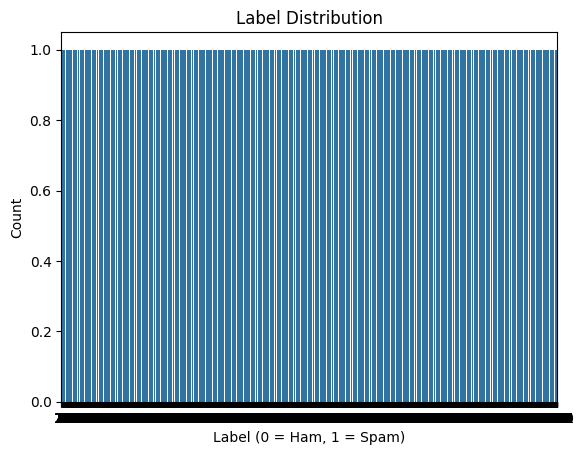

In [20]:
sns.countplot(df['target'])
plt.title("Label Distribution")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

SPLIT THE DATASETS

In [21]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


Text Vectorization using TF-IDF

In [22]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Train the Model

In [23]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
#Evaluate the Model
y_pred = model.predict(X_test_tfidf)

# Metrics

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.97


In [26]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 1.00


In [27]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.76


In [28]:
# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1352
           1       1.00      0.76      0.87       199

    accuracy                           0.97      1551
   macro avg       0.98      0.88      0.92      1551
weighted avg       0.97      0.97      0.97      1551



Visualize Performance

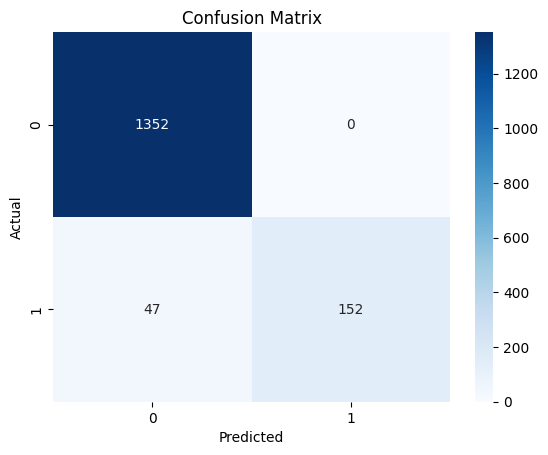

In [29]:
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Test with a Custom Message

In [30]:
sample_message = ["Congratulations! Your order has been placed successfully!"]
sample_tfidf = tfidf.transform(sample_message)
prediction = model.predict(sample_tfidf)
print("\nCustom Message Prediction: ", "Spam" if prediction[0] == 1 else "Ham")


Custom Message Prediction:  Ham
